In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
data_df = pd.read_csv("insurance_part2_data.csv")

In [3]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df=data_df.copy()

In [5]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [6]:
lrAge,urAge=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>urAge,urAge,df['Age'])
df['Age']=np.where(df['Age']<lrAge,lrAge,df['Age'])


In [9]:
lrCommision,urCommision=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>urAge,urAge,df['Commision'])
df['Commision']=np.where(df['Commision']<lrAge,lrAge,df['Commision'])


In [7]:
lrDuration,urDuration=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>urDuration,urDuration,df['Duration'])
df['Duration']=np.where(df['Duration']<lrAge,lrAge,df['Duration'])


In [8]:
lrSales,urSales=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>urAge,urAge,df['Sales'])
df['Sales']=np.where(df['Sales']<lrAge,lrAge,df['Sales'])


<AxesSubplot:>

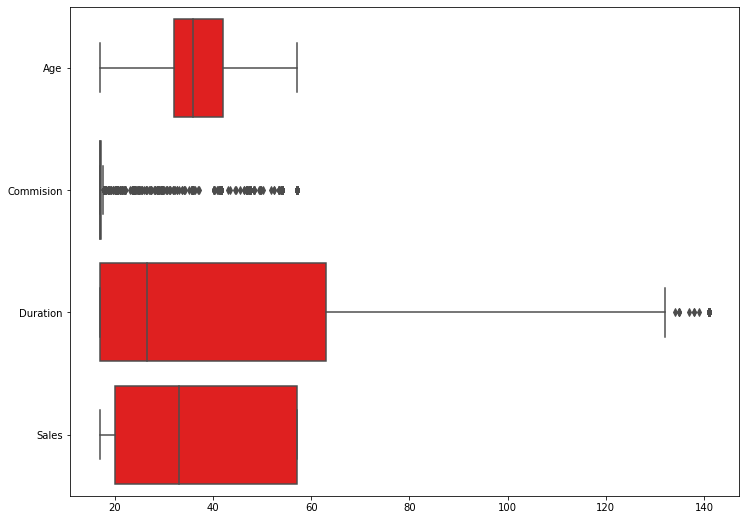

In [10]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df,orient='horizondal',color='red')


In [11]:
Q1 = np.percentile(df['Commision'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['Commision'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [12]:
# Upper bound
upper = np.where(df['Commision'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Commision'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)


New Shape:  (2258, 10)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2258 non-null   float64
 1   Agency_Code   2258 non-null   object 
 2   Type          2258 non-null   object 
 3   Claimed       2258 non-null   object 
 4   Commision     2258 non-null   float64
 5   Channel       2258 non-null   object 
 6   Duration      2258 non-null   float64
 7   Sales         2258 non-null   float64
 8   Product Name  2258 non-null   object 
 9   Destination   2258 non-null   object 
dtypes: float64(4), object(6)
memory usage: 258.6+ KB


In [15]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2258 non-null   float64
 1   Agency_Code   2258 non-null   int8   
 2   Type          2258 non-null   int8   
 3   Claimed       2258 non-null   int8   
 4   Commision     2258 non-null   float64
 5   Channel       2258 non-null   int8   
 6   Duration      2258 non-null   float64
 7   Sales         2258 non-null   float64
 8   Product Name  2258 non-null   int8   
 9   Destination   2258 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 166.0 KB


In [18]:
X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")



In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=5)

In [20]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [22]:
from sklearn.neural_network import MLPClassifier

In [24]:
from sklearn.model_selection import GridSearchCV


In [25]:
param_grid = {
    'hidden_layer_sizes': [(50,100,200)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam'],
    'tol': [0.01],
    'max_iter' : [2500,3000,4000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [26]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(50, 100, 200)],
                         'max_iter': [2500, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.01]})

In [27]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (50, 100, 200),
 'max_iter': 3000,
 'solver': 'adam',
 'tol': 0.01}

In [28]:
best_grid = grid_search.best_estimator_

In [32]:
best_grid

MLPClassifier(hidden_layer_sizes=(50, 100, 200), max_iter=3000, tol=0.01)

In [29]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1200
           1       0.52      0.59      0.55       380

    accuracy                           0.77      1580
   macro avg       0.69      0.71      0.70      1580
weighted avg       0.78      0.77      0.77      1580



In [33]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       516
           1       0.49      0.59      0.54       162

    accuracy                           0.76       678
   macro avg       0.68      0.70      0.69       678
weighted avg       0.77      0.76      0.76       678



AUC: 0.800


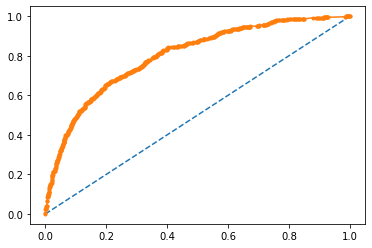

In [34]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.780


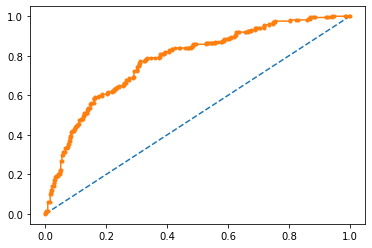

In [35]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(train_labels, ytrain_predict)

array([[993, 207],
       [156, 224]])

In [43]:
993+224

1217

In [44]:
1217+156+207

1580

In [45]:
1217/1580

0.770253164556962

In [42]:
confusion_matrix(test_labels, ytest_predict)

array([[418,  98],
       [ 67,  95]])

In [46]:
418+95

513

In [47]:
513+98+67

678

In [49]:
513/678

0.7566371681415929